## Laplace transforms を SymPy　でやってみる

The Laplace transform is  

$$\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s $$

ラプラス変換をSymPyで行ってみる。　
[Sympy のドキュメントのLaplace変換](https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.LaplaceTransform)

In [1]:
from sympy import *
t=Symbol('t', real=True)
s=Symbol('s', real=True, positive=True)
f=1
F=Integral(f*exp(-s*t),(t,0,oo))

In [2]:
F

Integral(exp(-s*t), (t, 0, oo))

In [3]:
F.doit() #.doit() は　Fを評価する。式を出すということ

1/s

In [4]:
laplace_transform(f,t,s)

(1/s, 0, True)

In [5]:
laplace_transform(f,t,s , noconds=True)

1/s

ラプラス変換は線形です。つまり、

$$ L\left( at+bg\right) =aL\left( t\right) +bL\left( g\right) $$

もう 1 つの重要な特性は、シフト特性です。関数 𝑓(𝑡) にラプラス変換 𝐹(s) と exp(−𝑎𝑡) を掛けてからラプラス変換を行うと、これは 𝐹 の引数をシフトするだけです

$$ \mathcal L(e^{-at}f(t))=F(s+a) $$

これは、exp(−𝑎𝑡) のラプラス変換を計算することで最も簡単にわかります。これは、定数 1 に exp(−𝑎𝑡) を乗算すると理解できるため、1/(s+𝑎) が得られるはずです。確認しよう：

In [6]:
a=Symbol('a', real=True, positive=True)
Integral(exp(-s*t)*exp(-a*t),(t,0,oo))

Integral(exp(-a*t)*exp(-s*t), (t, 0, oo))

In [7]:
_.doit().simplify()

1/(a + s)

### laplace_transform　Sympyライブラリの関数

収束するとは限らないことに注意

In [8]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

In [9]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [10]:
import sympy
invL(F)

InverseLaplaceTransform(Integral(exp(-s*t), (t, 0, oo)), s, t, _None)

In [11]:
F

Integral(exp(-s*t), (t, 0, oo))

In [12]:
f=sympy.exp(-a*t)

In [13]:
f

exp(-a*t)

In [14]:
F=L(f)

In [15]:
F

1/(a + s)

In [16]:
invL(F)

exp(-a*t)*Heaviside(t)

$ \theta (t) $ は単位ステップ関数は、ヘヴィサイド ステップ関数とも呼ばれます。この関数は逆ラプラス変換でよく見られます。

In [17]:
sympy.Heaviside(t)

Heaviside(t)

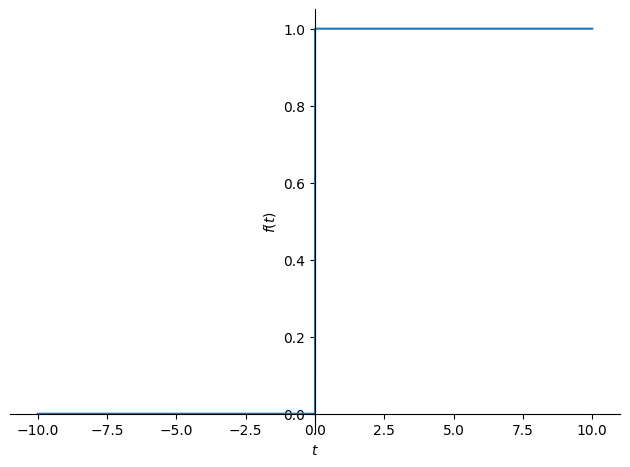

In [18]:
sympy.plot(sympy.Heaviside(t));

変数に値を代入: subs()メソッド a=2 を入れる　Sympy

In [19]:
invL(F).subs({a:2}) 

exp(-2*t)*Heaviside(t)

原関数と、ラプラス変換のの関数を表示

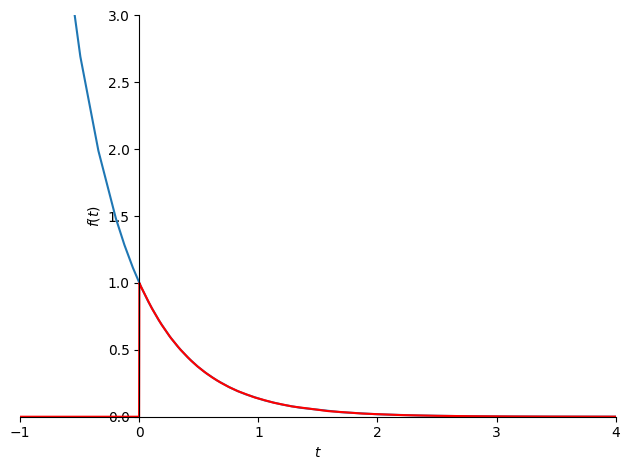

In [20]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}), 
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

# Laplace変換表　

In [21]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(a*t),
         cos(a*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(t),
         exp(-a*t)*cos(t),
         ]
functions

[1,
 t,
 exp(-a*t),
 t*exp(-a*t),
 t**2*exp(-a*t),
 sin(a*t),
 cos(a*t),
 1 - exp(-a*t),
 exp(-a*t)*sin(t),
 exp(-a*t)*cos(t)]

In [22]:
Fs = [L(f) for f in functions]

In [23]:
from pandas import DataFrame

In [24]:
def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args]

In [25]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(a t \right)}$$,$$\frac{a}{a^{2} + s^{2}}$$
6,$$\cos{\left(a t \right)}$$,$$\frac{s}{a^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$- \frac{1}{a + s} + \frac{1}{s}$$
8,$$e^{- a t} \sin{\left(t \right)}$$,$$\frac{1}{\left(a + s\right)^{2} + 1}$$
9,$$e^{- a t} \cos{\left(t \right)}$$,$$\frac{a + s}{\left(a + s\right)^{2} + 1}$$


# 関数の形を見てみる
i= に関数の数字を入れてみて

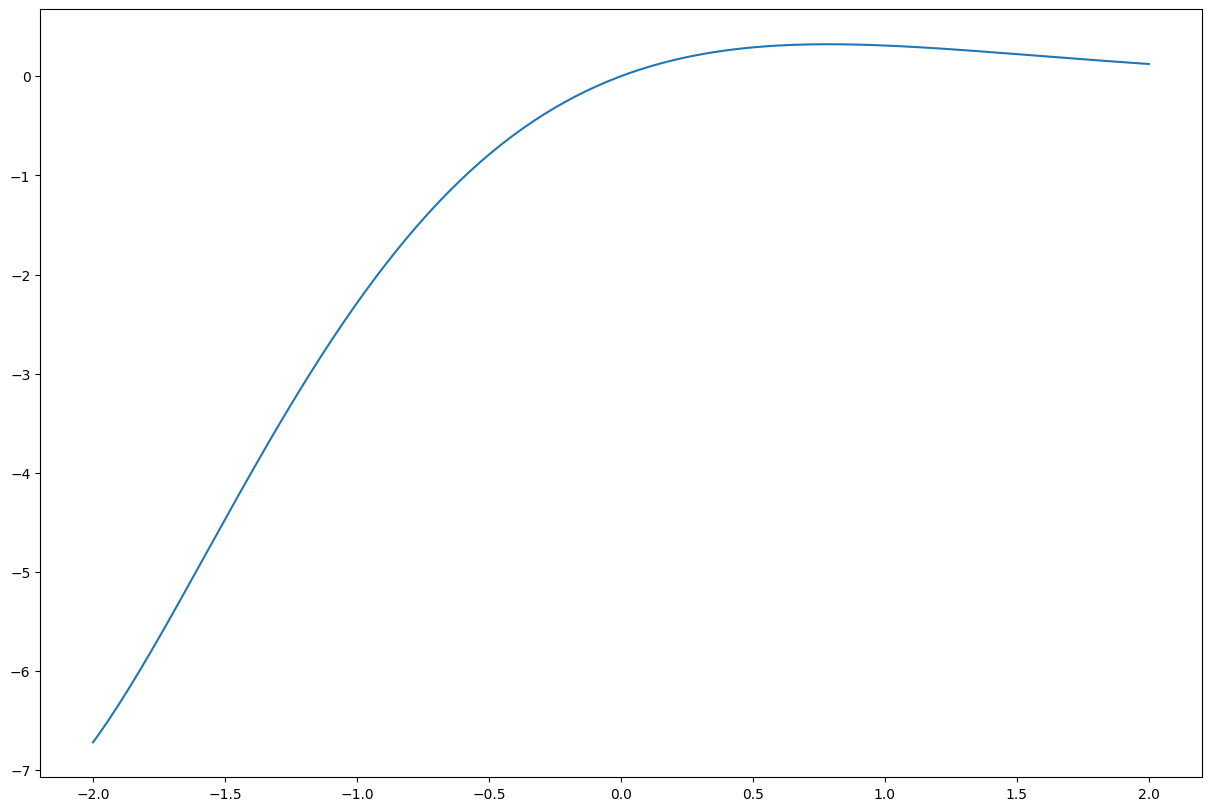

exp(-a*t)*sin(t)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 8))
x=np.linspace(-2,2,200)
i=8
f=lambdify(t,functions[i].subs({a:1}))
f=f(x)
ax.plot(x,f)
plt.show()
functions[i]

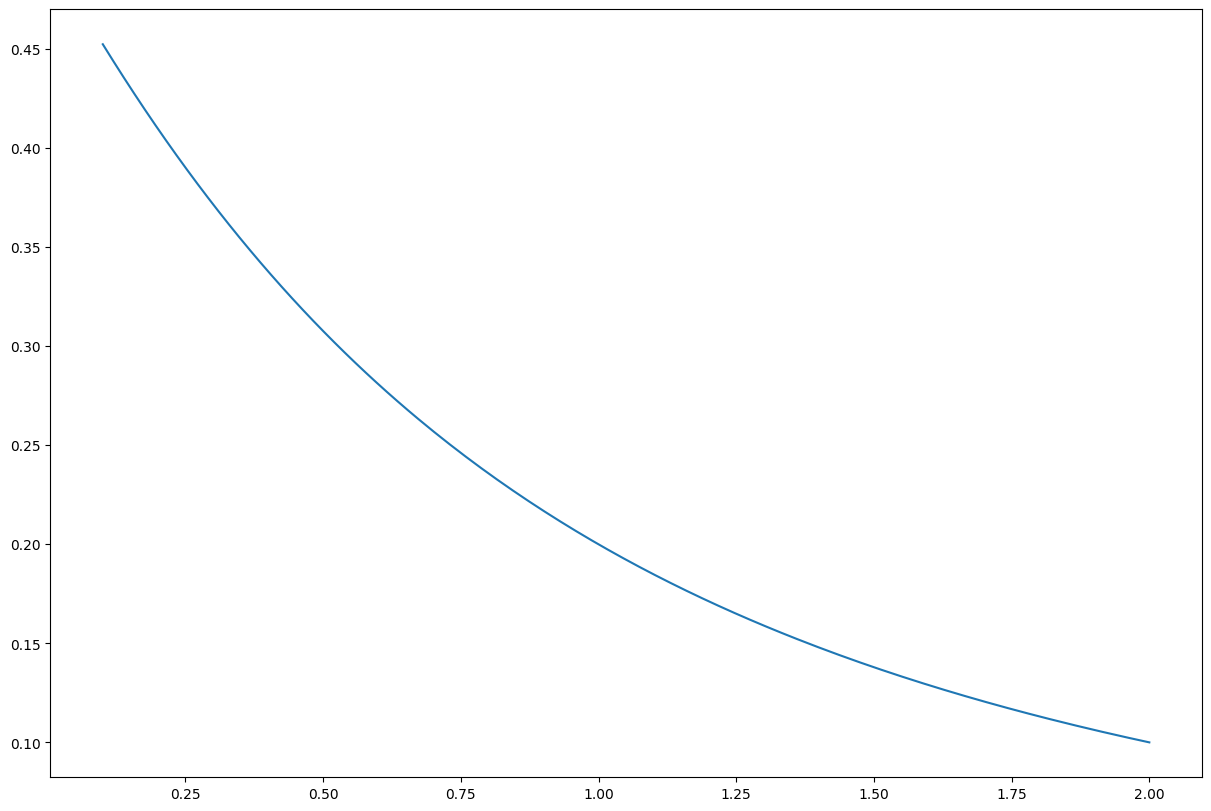

1/((a + s)**2 + 1)

In [29]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 8))
x=np.linspace(0.1,2,200)
i=8
f=lambdify(s,Fs[i].subs({a:1}))
f=f(x)
ax.plot(x,f)
plt.show()
Fs[i]